In [ ]:
# Samuel Göbel
# Master Thesis Data Science and Society
# Tilburg University
# May 2025

# Burnout Prediction Among Medical Students




# ------------------------------------------------------------------------------
# EDA, Outlier, and Preprocessing
# ------------------------------------------------------------------------------

In [ ]:
# Contents

# 1. Unvariate Analysis, numerical and categorical variables
# 2. Outlier Analysis
# 3. Inter Quartile Ranges
# 4. Preprocessing
# 5. Feature Engineering Target
# 6. Visualize Target Variables

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [ ]:
# unaltered data
data = pd.read_csv("/content/drive/MyDrive/Master Thesis 2025/BurnoutDataset/Data Carrard et al. 2022 MedTeach.csv")

codebook = pd.read_csv("/content/drive/MyDrive/Master Thesis 2025/BurnoutDataset/Codebook Carrard et al. 2022 MedTeach.csv", sep = ";")


In [ ]:
data.head()

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


In [ ]:
data.info()

# 886, 20
# no missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         886 non-null    int64  
 1   age        886 non-null    int64  
 2   year       886 non-null    int64  
 3   sex        886 non-null    int64  
 4   glang      886 non-null    int64  
 5   part       886 non-null    int64  
 6   job        886 non-null    int64  
 7   stud_h     886 non-null    int64  
 8   health     886 non-null    int64  
 9   psyt       886 non-null    int64  
 10  jspe       886 non-null    int64  
 11  qcae_cog   886 non-null    int64  
 12  qcae_aff   886 non-null    int64  
 13  amsp       886 non-null    int64  
 14  erec_mean  886 non-null    float64
 15  cesd       886 non-null    int64  
 16  stai_t     886 non-null    int64  
 17  mbi_ex     886 non-null    int64  
 18  mbi_cy     886 non-null    int64  
 19  mbi_ea     886 non-null    int64  
dtypes: float64

# 1. Univariate Analysis

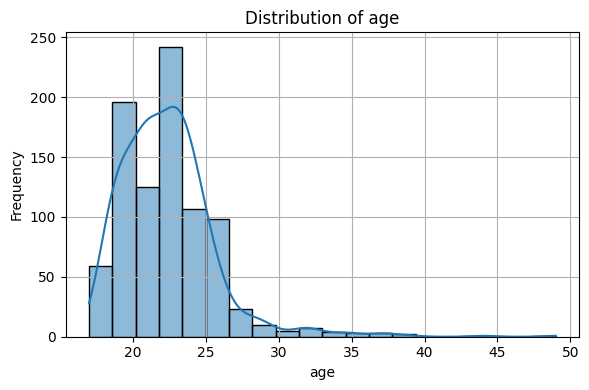

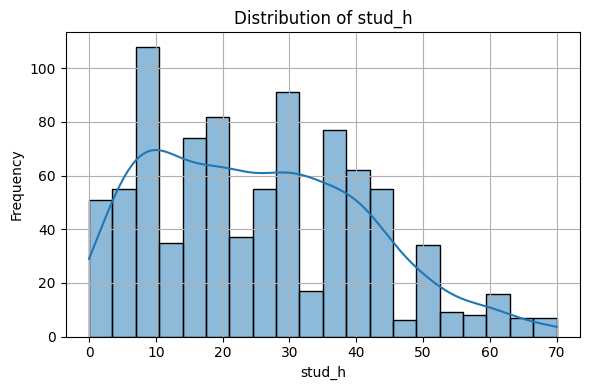

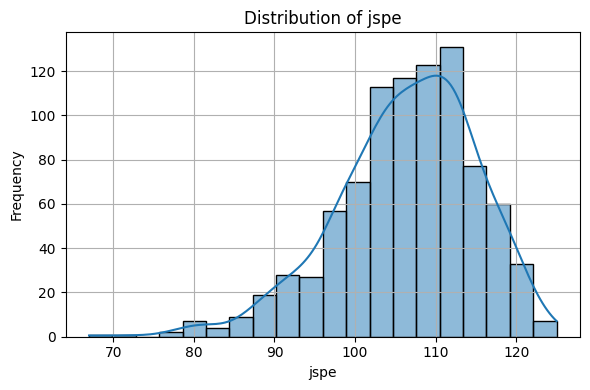

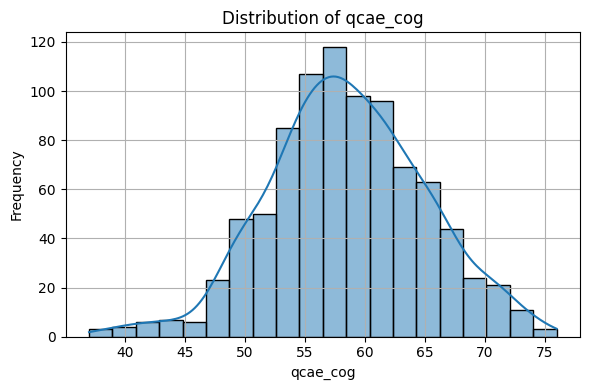

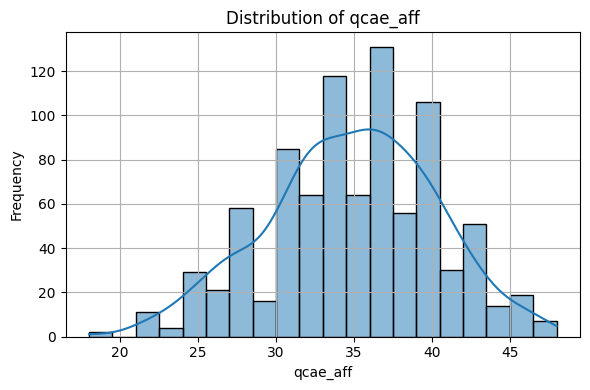

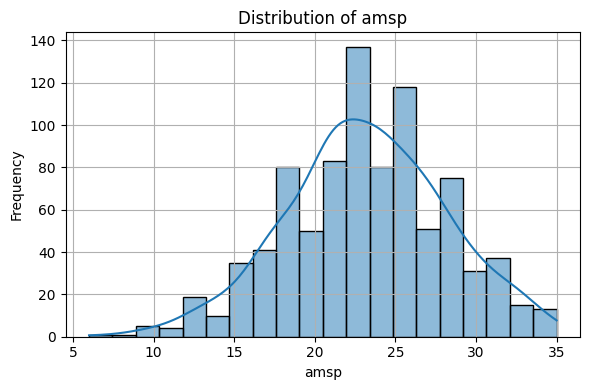

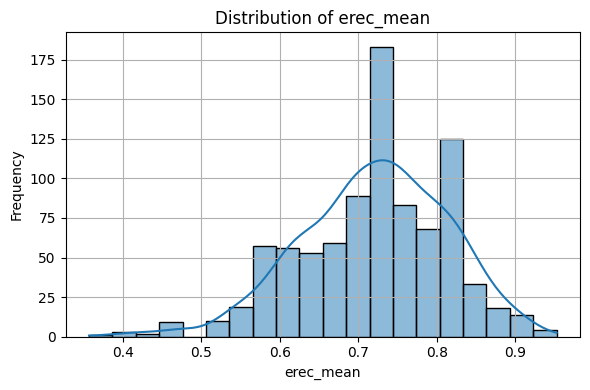

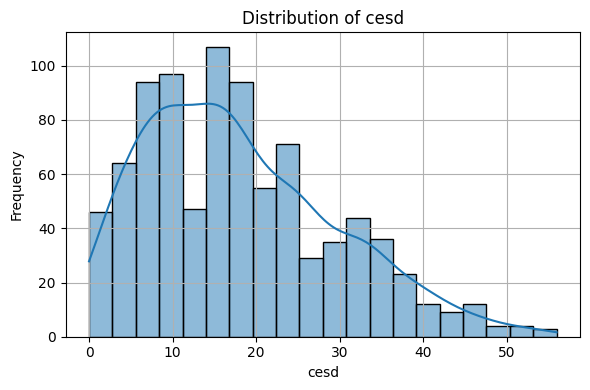

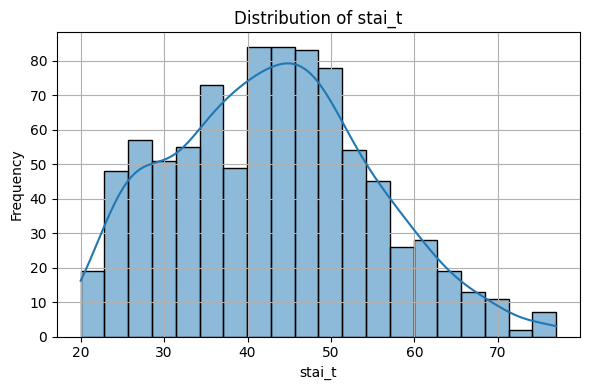

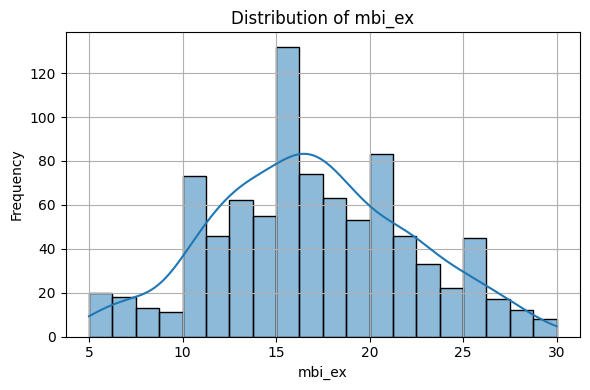

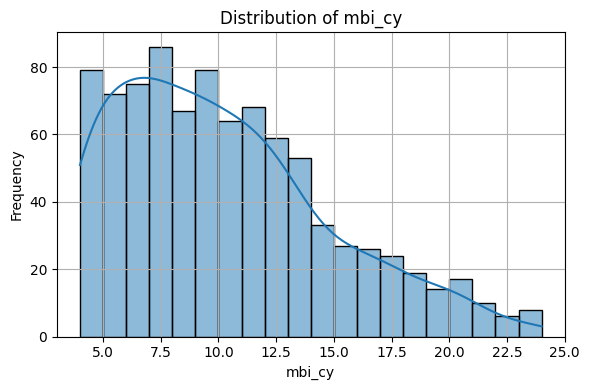

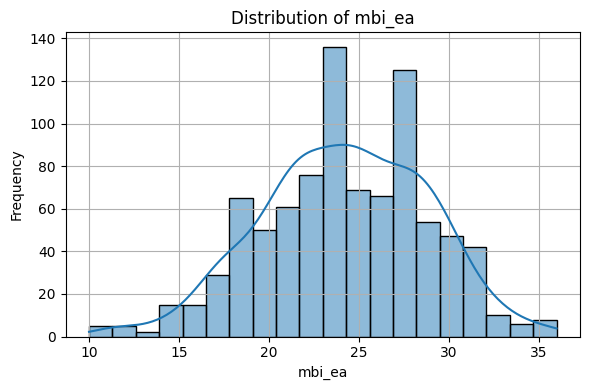

In [ ]:
# Separate numerical and categorical variables
categorical_vars = data[['year', 'sex', 'glang', 'part',
                         'job', 'health', 'psyt']]



numerical_vars = data[['age', 'stud_h', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp',
                       'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy',
                       'mbi_ea']]







# Plot histograms with KDE (Kernel Density Estimate) overlaid
for col in numerical_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], bins=20, kde=True, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


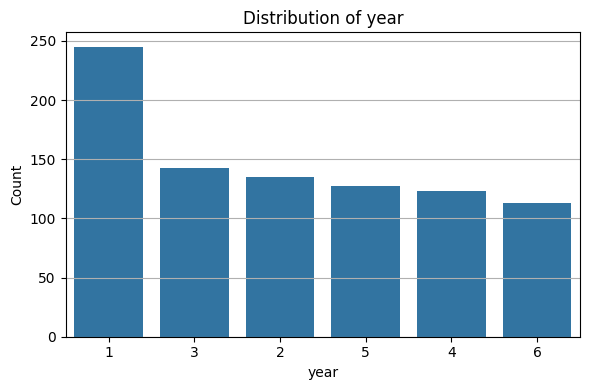

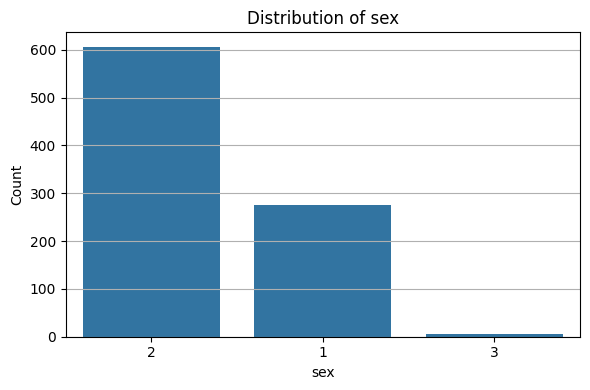

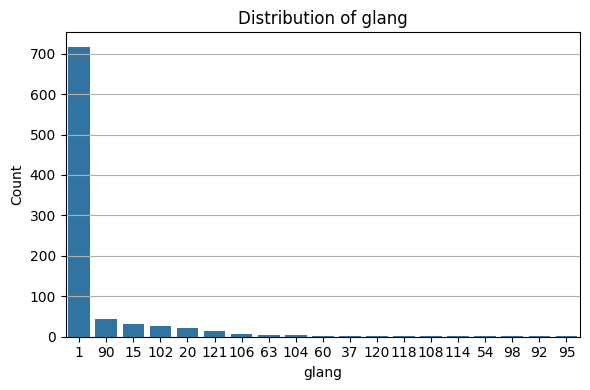

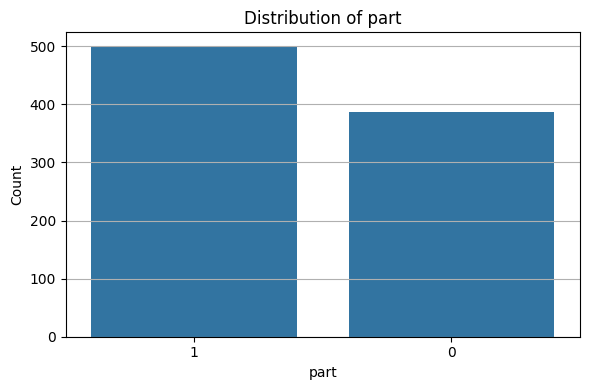

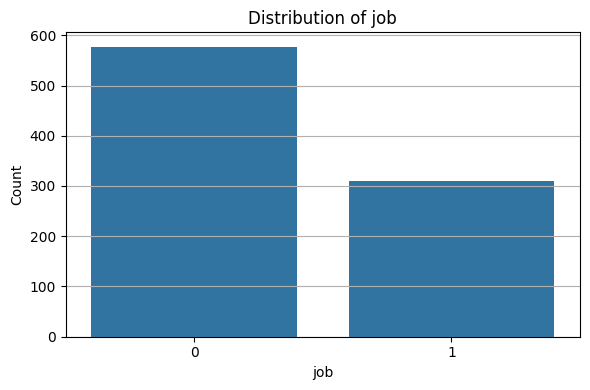

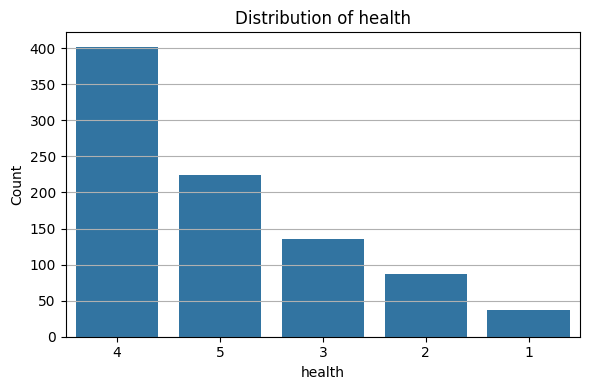

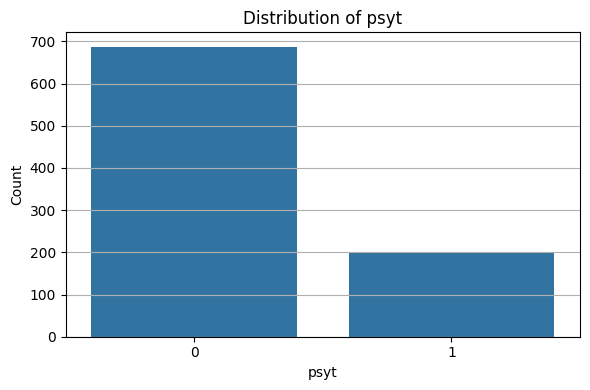

In [ ]:
# Plot categorical histograms with KDE (Kernel Density Estimate) overlaid



# Separate numerical and categorical variables
categorical_vars = data[['year', 'sex', 'glang', 'part',
                         'job', 'health', 'psyt']]

numerical_vars = data[['age', 'stud_h', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp',
                       'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy',
                       'mbi_ea']]





# Plot bar plots for categorical variables
for col in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[col], order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# 2.Outlier *Analysis*

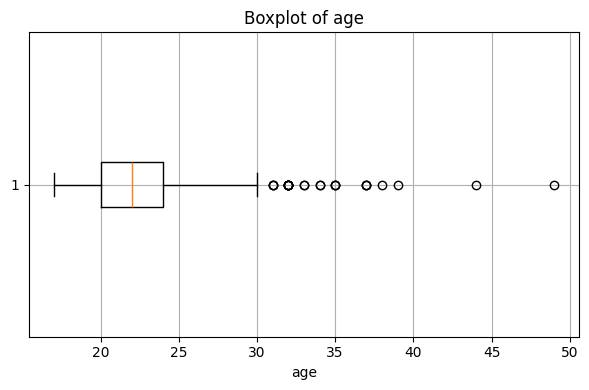

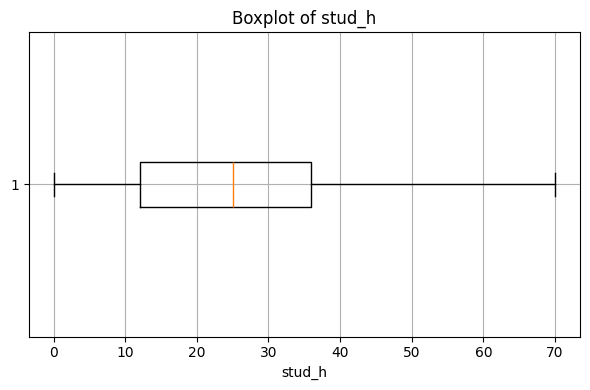

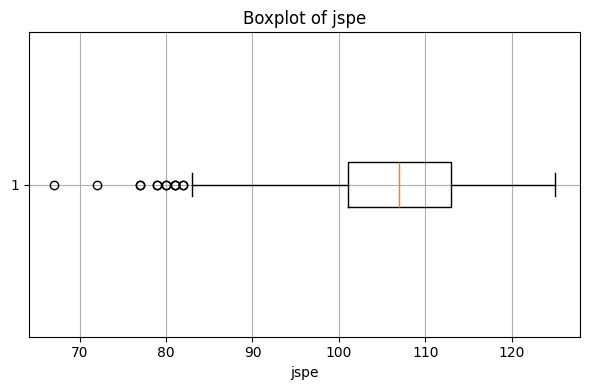

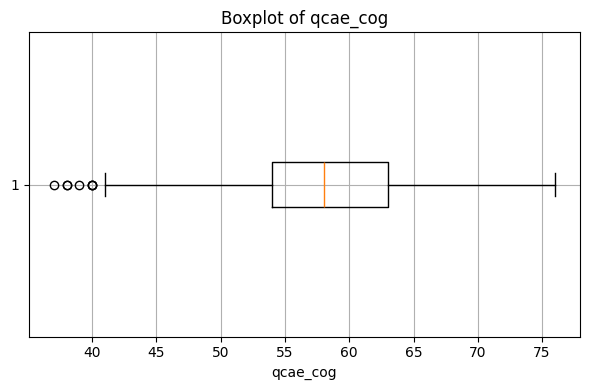

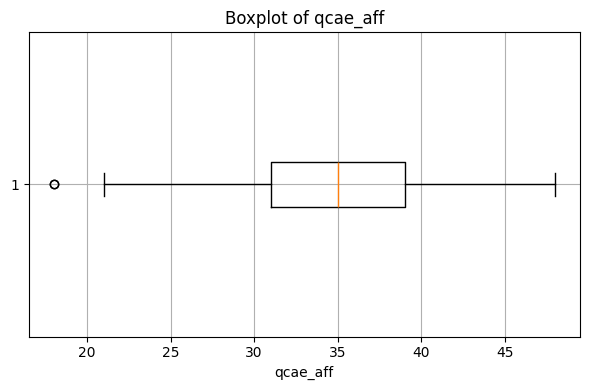

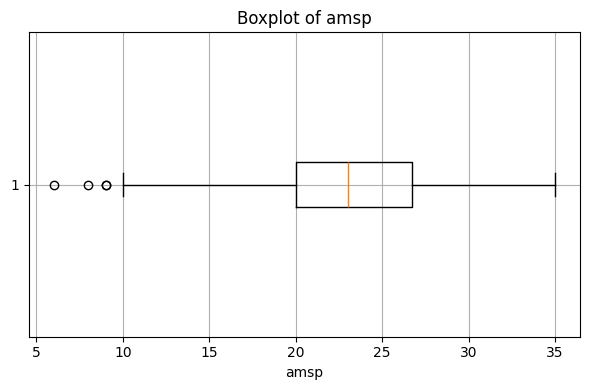

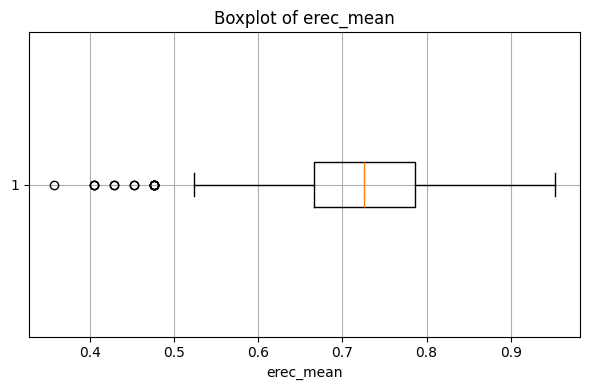

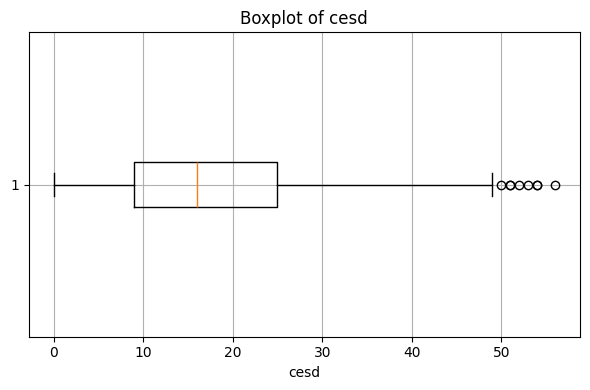

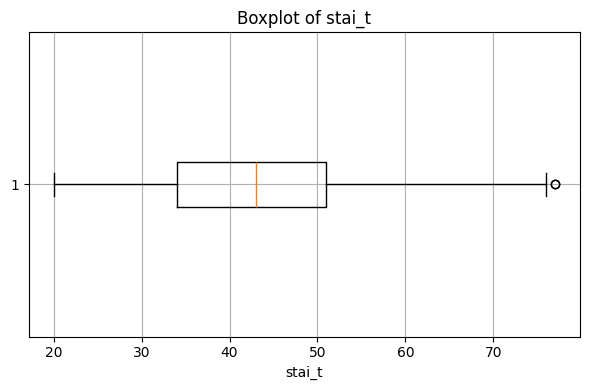

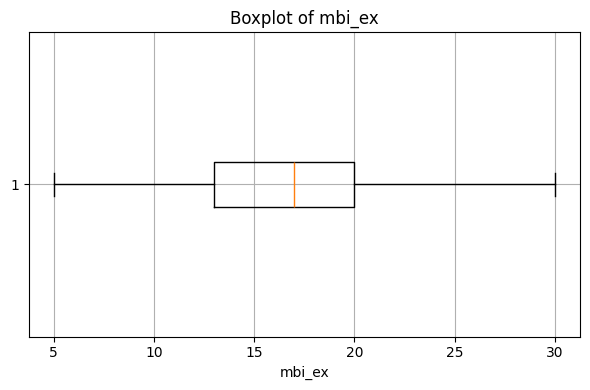

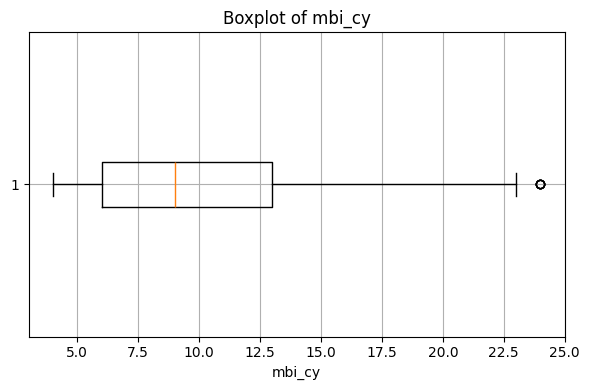

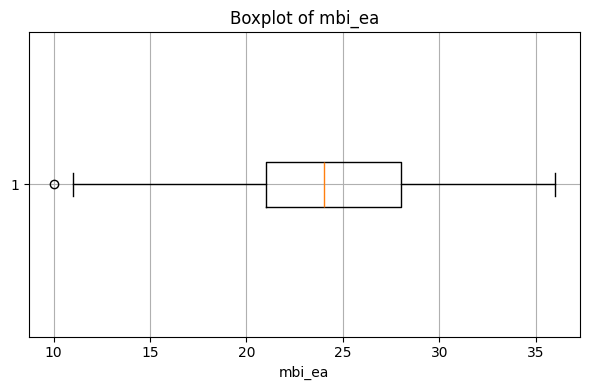

In [ ]:
# Outlier Analysis -------------------------
# IQR method



# boxplots for numerical variables

for col in numerical_vars:
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 3. Inter Quartile Range

In [ ]:
# IQR-Based Outlier Detection for Numerical Variables

outlier_summary = {}

for col in numerical_vars:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    outlier_summary[col] = {
        'num_outliers': outliers.shape[0],
        'percent_outliers': round(100 * outliers.shape[0] / data.shape[0], 2),
        'lower_bound': round(lower_bound, 2),
        'upper_bound': round(upper_bound, 2)
    }

# Convert to DataFrame for easy viewing
outlier_df = pd.DataFrame(outlier_summary).T.sort_values(by='percent_outliers', ascending=False)




outlier_df


,num_outliers,percent_outliers,lower_bound,upper_bound
age,24.0,2.71,14.00,30.00
erec_mean,15.0,1.69,0.49,0.96
jspe,13.0,1.47,83.00,131.00
cesd,8.0,0.90,-15.00,49.00
qcae_cog,7.0,0.79,40.50,76.50
mbi_cy,5.0,0.56,-4.50,23.50
amsp,4.0,0.45,9.88,36.88
qcae_aff,2.0,0.23,19.00,51.00
stai_t,2.0,0.23,8.50,76.50
mbi_ea,1.0,0.11,10.50,38.50


# 4. Preprocessing

In [ ]:
# Preprocessing steps ----------------------------------------------------------



# 1. Log transform: stud_h, cesd --> right skewed variables

# 2. Standardize all numerical variables, apart from target mbi-variables:
# 'age', 'stud_h', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t'

# 3. One-hot encode all categorical variables:
# 'year', 'sex', 'glang', 'part','job', 'health', 'psyt'


# ------------------------------------------------------------------------------


# Drop 'id' and 'glang'
data = data.drop(columns=['id', 'glang'], errors='ignore')





# Step 1: Log transform 'stud_h' and 'cesd'
data['stud_h_log'] = np.log1p(data['stud_h'])
data['cesd_log'] = np.log1p(data['cesd'])






# Step 2: Standardize selected numerical variables (excluding MBI targets)
standardize_vars = ['age', 'stud_h_log', 'jspe', 'qcae_cog', 'qcae_aff',
                    'amsp', 'erec_mean', 'cesd_log', 'stai_t']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[standardize_vars])






# Add standardized versions to DataFrame with suffix '_z'
for i, col in enumerate(standardize_vars):
    data[f'{col}_z'] = scaled_data[:, i]






# One-hot encode categorical variables (glang already dropped)
categorical_vars = ['year', 'sex', 'part', 'job', 'health', 'psyt']
data_encoded = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

data_encoded.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           886 non-null    int64  
 1   stud_h        886 non-null    int64  
 2   jspe          886 non-null    int64  
 3   qcae_cog      886 non-null    int64  
 4   qcae_aff      886 non-null    int64  
 5   amsp          886 non-null    int64  
 6   erec_mean     886 non-null    float64
 7   cesd          886 non-null    int64  
 8   stai_t        886 non-null    int64  
 9   mbi_ex        886 non-null    int64  
 10  mbi_cy        886 non-null    int64  
 11  mbi_ea        886 non-null    int64  
 12  stud_h_log    886 non-null    float64
 13  cesd_log      886 non-null    float64
 14  age_z         886 non-null    float64
 15  stud_h_log_z  886 non-null    float64
 16  jspe_z        886 non-null    float64
 17  qcae_cog_z    886 non-null    float64
 18  qcae_aff_z    886 non-null    

In [ ]:
# Drop original columns that have been transformed
drop_vars = ['stud_h', 'stud_h_log', 'cesd', 'cesd_log'] + ['age', 'jspe', 'qcae_cog', 'qcae_aff',
                                  'amsp', 'erec_mean', 'stai_t']

data_encoded_clean = data_encoded.drop(columns=drop_vars, errors='ignore')





# Now the original variables have been dropped, only keeping
# the log transformed versions and the standadized versions.



data_encoded_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mbi_ex        886 non-null    int64  
 1   mbi_cy        886 non-null    int64  
 2   mbi_ea        886 non-null    int64  
 3   age_z         886 non-null    float64
 4   stud_h_log_z  886 non-null    float64
 5   jspe_z        886 non-null    float64
 6   qcae_cog_z    886 non-null    float64
 7   qcae_aff_z    886 non-null    float64
 8   amsp_z        886 non-null    float64
 9   erec_mean_z   886 non-null    float64
 10  cesd_log_z    886 non-null    float64
 11  stai_t_z      886 non-null    float64
 12  year_2        886 non-null    bool   
 13  year_3        886 non-null    bool   
 14  year_4        886 non-null    bool   
 15  year_5        886 non-null    bool   
 16  year_6        886 non-null    bool   
 17  sex_2         886 non-null    bool   
 18  sex_3         886 non-null    

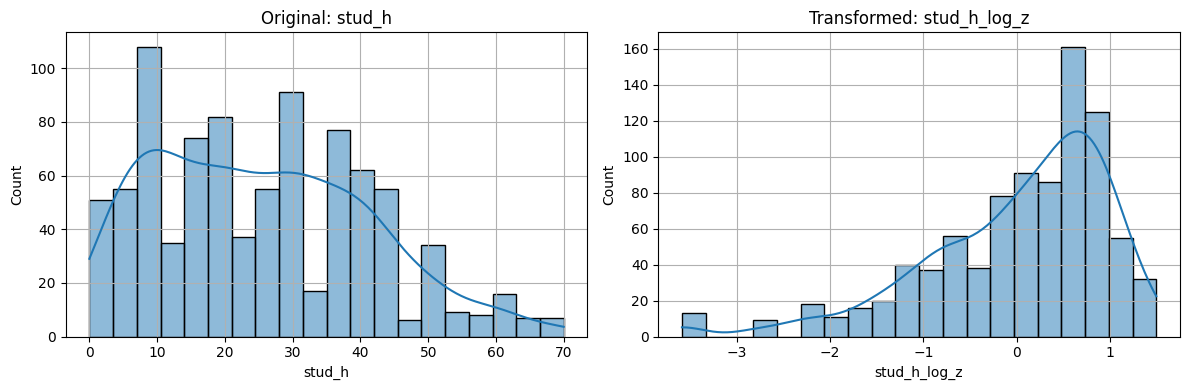

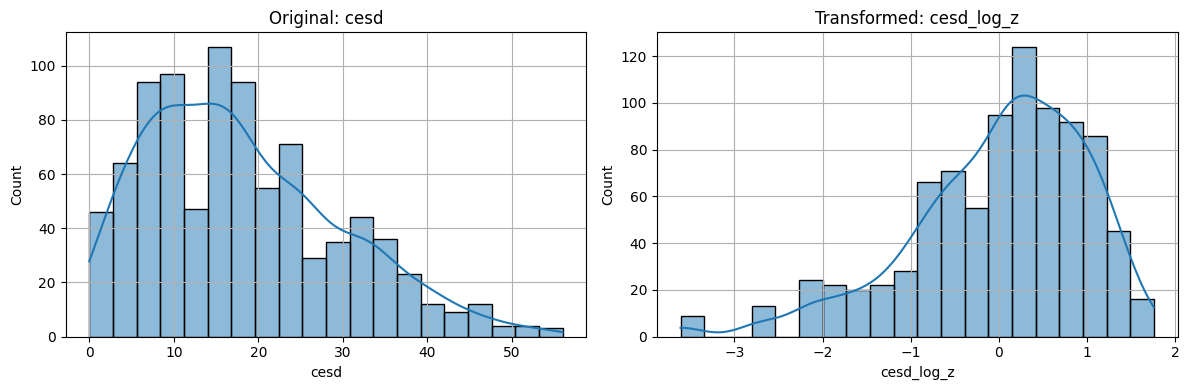

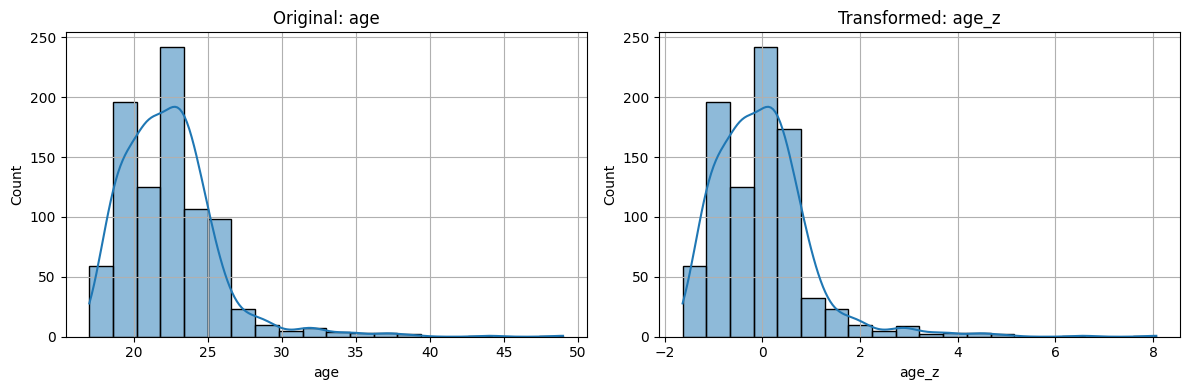

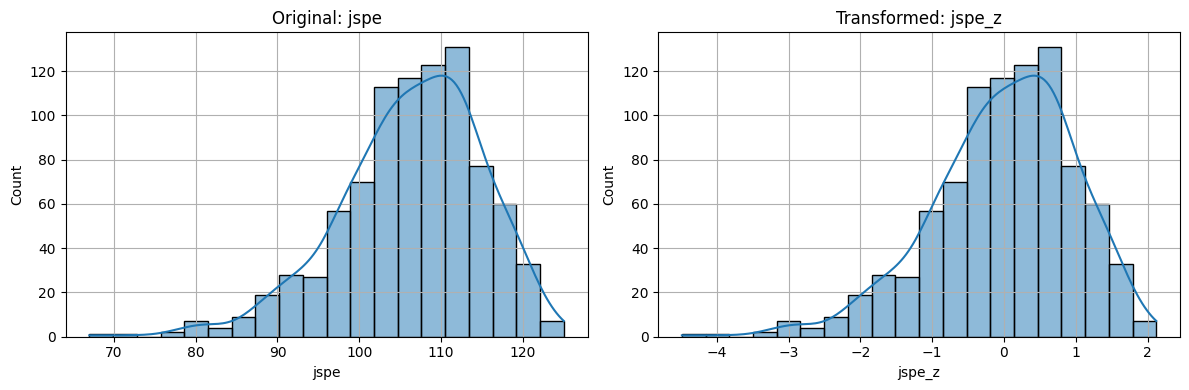

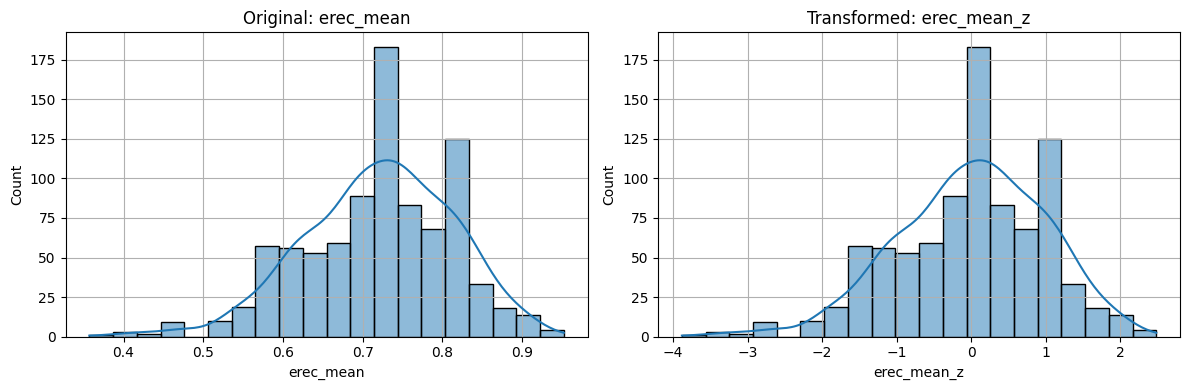

In [ ]:
# Variables to visualize: original vs standardized/log-transformed
compare_vars = {
    'stud_h': 'stud_h_log_z',
    'cesd': 'cesd_log_z',
    'age': 'age_z',
    'jspe': 'jspe_z',
    'erec_mean': 'erec_mean_z',
}







# Plot original vs transformed distributions side by side
for original, transformed in compare_vars.items():
    plt.figure(figsize=(12, 4))

    # Original distribution
    plt.subplot(1, 2, 1)
    sns.histplot(data_encoded[original], bins=20, kde=True)
    plt.title(f'Original: {original}')
    plt.xlabel(original)
    plt.grid(True)

    # Transformed distribution
    plt.subplot(1, 2, 2)
    sns.histplot(data_encoded[transformed], bins=20, kde=True)
    plt.title(f'Transformed: {transformed}')
    plt.xlabel(transformed)
    plt.grid(True)

    plt.tight_layout()
    plt.show()


# 5. Feature Engineering Target

In [ ]:
# Feature engineer target variable, 'Burnout' binary,
# and mbi-total score





# ------------------------------------------------------------------------------
# 1. 'burnout' binary
# ------------------------------------------------------------------------------




# Reversing mbi_ea scores
max_val = data_encoded_clean['mbi_ea'].max()
data_encoded_clean['mbi_ea_rev'] = max_val - data_encoded_clean['mbi_ea']





# Compute means and standard deviations
mean_ex, std_ex = data_encoded_clean['mbi_ex'].mean(), data_encoded_clean['mbi_ex'].std()
mean_cy, std_cy = data_encoded_clean['mbi_cy'].mean(), data_encoded_clean['mbi_cy'].std()
mean_ea_rev, std_ea_rev = data_encoded_clean['mbi_ea_rev'].mean(), data_encoded_clean['mbi_ea_rev'].std()




# Define burnout classification
data_encoded_clean['burnout'] = np.where(
    (data_encoded_clean['mbi_ex'] >= mean_ex + std_ex) &
    (data_encoded_clean['mbi_cy'] >= mean_cy + std_cy) &
    (data_encoded_clean['mbi_ea_rev'] >= mean_ea_rev + std_ea_rev),
    1, 0
)










# ------------------------------------------------------------------------------
# 2. mbi_total score
# ------------------------------------------------------------------------------




# Summing mbi_ dimensions to obtain total score
data_encoded_clean['mbi_total'] = (
    data_encoded_clean['mbi_ex'] +
    data_encoded_clean['mbi_cy'] +
    data_encoded_clean['mbi_ea_rev']
)

# ------------------------------------------------------------------------------

data_encoded_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mbi_ex        886 non-null    int64  
 1   mbi_cy        886 non-null    int64  
 2   mbi_ea        886 non-null    int64  
 3   age_z         886 non-null    float64
 4   stud_h_log_z  886 non-null    float64
 5   jspe_z        886 non-null    float64
 6   qcae_cog_z    886 non-null    float64
 7   qcae_aff_z    886 non-null    float64
 8   amsp_z        886 non-null    float64
 9   erec_mean_z   886 non-null    float64
 10  cesd_log_z    886 non-null    float64
 11  stai_t_z      886 non-null    float64
 12  year_2        886 non-null    bool   
 13  year_3        886 non-null    bool   
 14  year_4        886 non-null    bool   
 15  year_5        886 non-null    bool   
 16  year_6        886 non-null    bool   
 17  sex_2         886 non-null    bool   
 18  sex_3         886 non-null    

# 6. Visualize Target



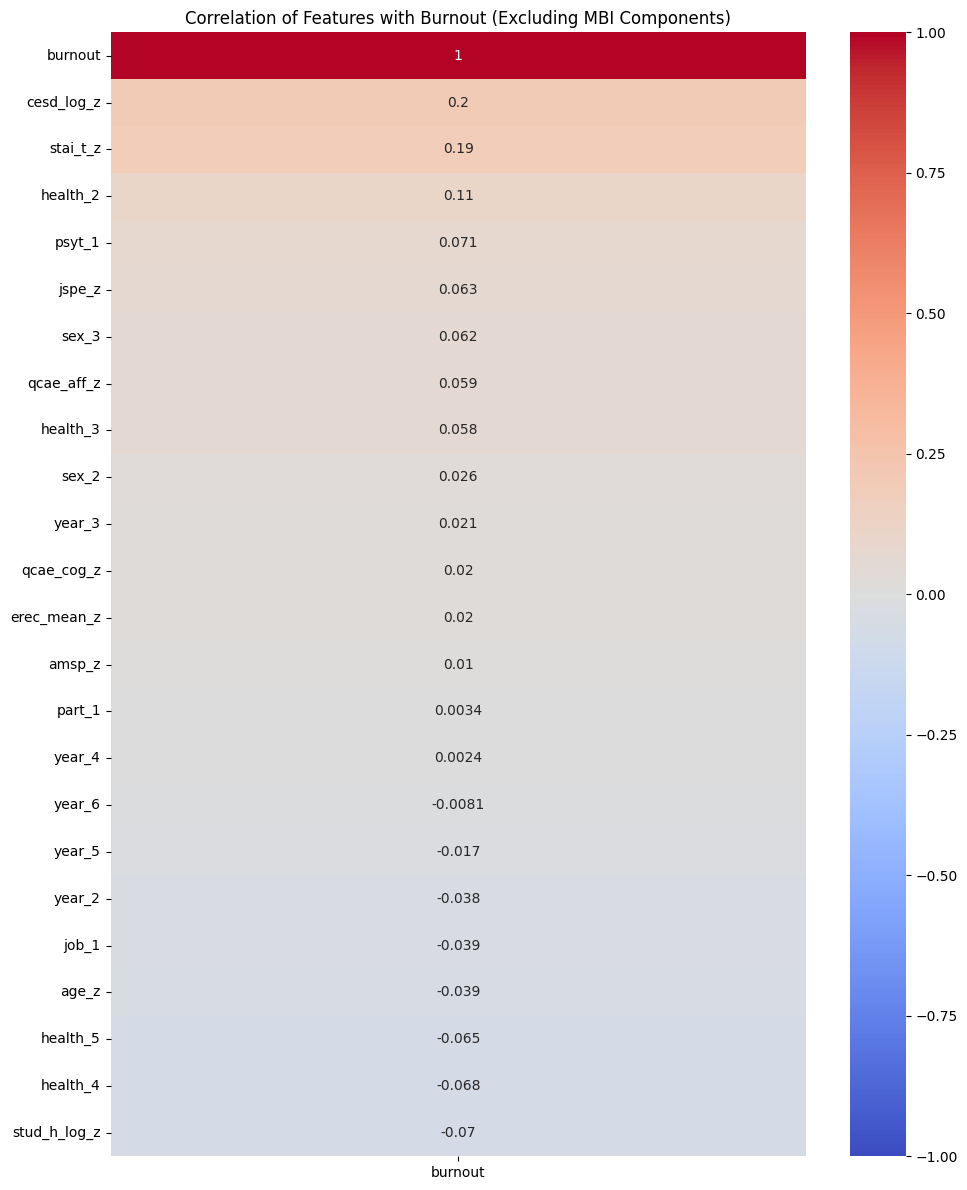

In [ ]:
# Heatmap 'burnout' ---------------



# Load the cleaned dataset
df = pd.read_csv("/content/drive/MyDrive/Master Thesis 2025/BurnoutDataset/data_encoded_clean.csv")


# Define MBI-related variables to exclude
mbi_related = ['mbi_ex', 'mbi_cy', 'mbi_ea', 'mbi_ea_rev', 'mbi_total']



# Drop MBI-related variables
df_filtered = df.drop(columns=mbi_related, errors='ignore')




# Select numeric and boolean columns
corr_vars = df_filtered.select_dtypes(include=[np.number, 'bool'])




# Compute correlation with 'burnout' only
corr_with_burnout = corr_vars.corr().loc[:, ['burnout']].sort_values(by='burnout', ascending=False)





# Plot the heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(corr_with_burnout, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Burnout (Excluding MBI Components)')
plt.tight_layout()
plt.show()


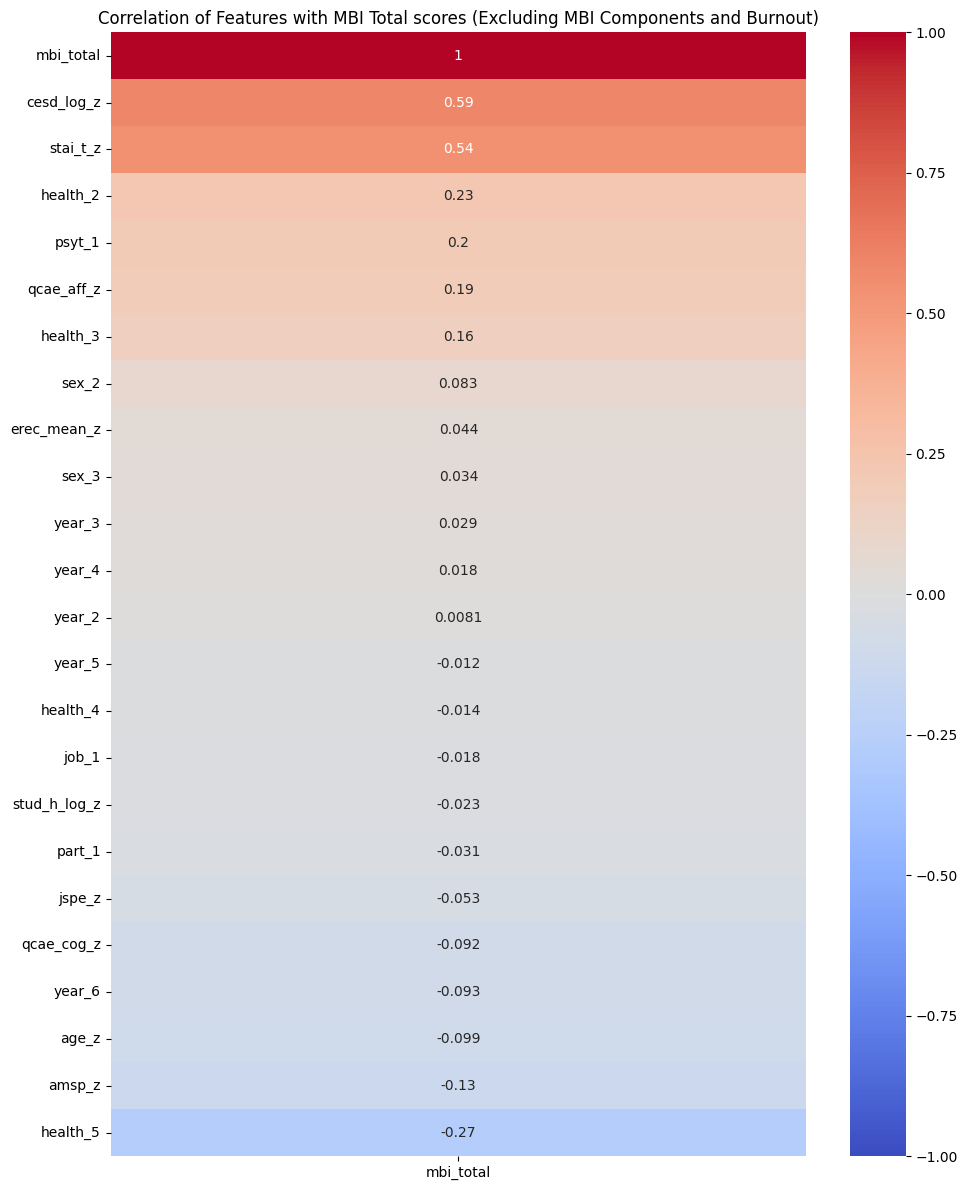

In [ ]:
# Heatmap 'mbi_total' ---------------






# Load the cleaned dataset
df = pd.read_csv("/content/drive/MyDrive/Master Thesis 2025/BurnoutDataset/data_encoded_clean.csv")




# Define MBI-related variables to exclude
mbi_related = ['mbi_ex', 'mbi_cy', 'mbi_ea', 'mbi_ea_rev', 'burnout']




# Drop MBI-related variables
df_filtered = df.drop(columns=mbi_related, errors='ignore')




# Select numeric and boolean columns
corr_vars = df_filtered.select_dtypes(include=[np.number, 'bool'])




# Compute correlation with 'burnout' only
corr_with_burnout = corr_vars.corr().loc[:, ['mbi_total']].sort_values(by='mbi_total', ascending=False)





# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))
sns.heatmap(corr_with_burnout, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with MBI Total scores (Excluding MBI Components and Burnout)')
plt.tight_layout()
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mbi_ex        886 non-null    int64  
 1   mbi_cy        886 non-null    int64  
 2   mbi_ea        886 non-null    int64  
 3   age_z         886 non-null    float64
 4   stud_h_log_z  886 non-null    float64
 5   jspe_z        886 non-null    float64
 6   qcae_cog_z    886 non-null    float64
 7   qcae_aff_z    886 non-null    float64
 8   amsp_z        886 non-null    float64
 9   erec_mean_z   886 non-null    float64
 10  cesd_log_z    886 non-null    float64
 11  stai_t_z      886 non-null    float64
 12  year_2        886 non-null    bool   
 13  year_3        886 non-null    bool   
 14  year_4        886 non-null    bool   
 15  year_5        886 non-null    bool   
 16  year_6        886 non-null    bool   
 17  sex_2         886 non-null    bool   
 18  sex_3         886 non-null    

In [ ]:
# SAVE PREPROCESSED DATA AS A NEW CSV FILE!

# data_encoded_clean.to_csv("data_encoded_clean.csv", index=False)


In [ ]:

import pandas

df = pandas.read_csv("/content/drive/MyDrive/Master Thesis 2025/BurnoutDataset/data_encoded_clean.csv")

In [ ]:
# Count the number of participants in each burnout class
burnout_counts = df['burnout'].value_counts()


print(burnout_counts)


burnout
0    851
1     35
Name: count, dtype: int64


In [ ]:
df['mbi_total'].describe()

,mbi_total
count,886.000000
mean,38.749436
std,11.919996
min,9.000000
25%,30.000000
50%,38.000000
75%,46.750000
max,78.000000


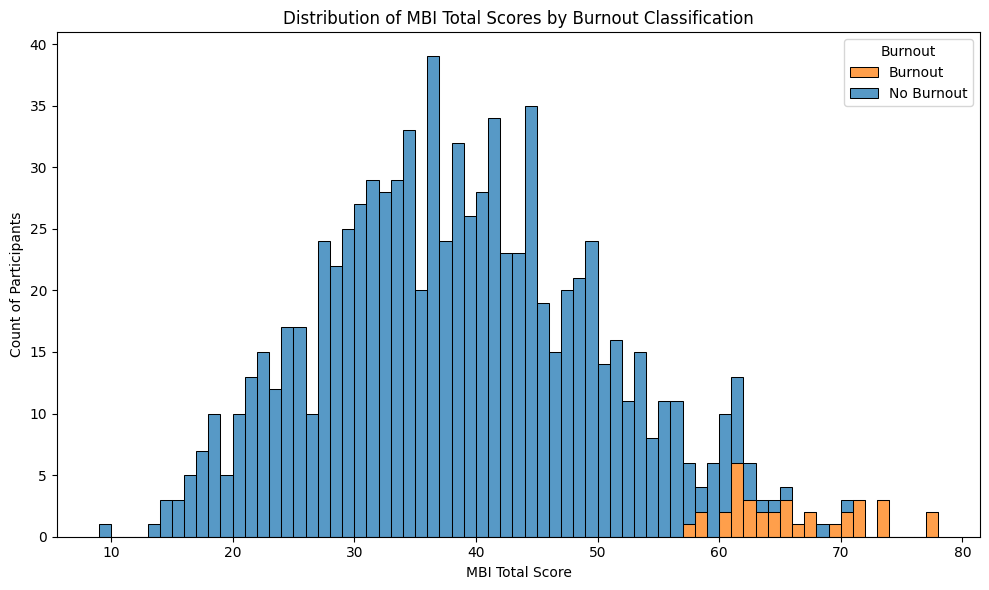

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns




# Set figure size
plt.figure(figsize=(10, 6))

# Plot the distribution of mbi_total, color-coded by burnout classification
sns.histplot(data=df, x='mbi_total', hue='burnout', multiple='stack', binwidth=1)

# Customize labels and title
plt.xlabel("MBI Total Score")
plt.ylabel("Count of Participants")
plt.title("Distribution of MBI Total Scores by Burnout Classification")
plt.legend(title="Burnout", labels=["Burnout", "No Burnout"])
plt.tight_layout()
plt.show()
